# Modelos usando el algoritmo de redes neuronales

# Importación de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import preprocessing
import informe
import sklearn
from sklearn.model_selection import train_test_split
sns.set()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
GSPREADHSEET_DOWNLOAD_URL = (
    "https://docs.google.com/spreadsheets/d/{gid}/export?format=csv&id={gid}".format
)

FIUFIP_2021_1_GID = '1-DWTP8uwVS-dZY402-dm0F9ICw_6PNqDGLmH0u8Eqa0'
df = pd.read_csv(GSPREADHSEET_DOWNLOAD_URL(gid=FIUFIP_2021_1_GID))

# Llamado a funciones de preprocesamiento

## Conversión de variables
- Hay que convertir todos los features categóricos a númericos. Para variables categóricas se usarán Dummy Variables y para ordinales OrdinalEncoder.

In [3]:
X = df.drop('tiene_alto_valor_adquisitivo', axis=1)
X = preprocessing.remove_irrelevant_features(X)
X = preprocessing.one_hot_encodding(X)

# Se separa el dataset en entrenamiento y holdout
y = df.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train, scalar = preprocessing.escalar(X_train)
X_test, scalar = preprocessing.escalar(X_test, scalar)
X_train

,categoria_de_trabajo_empleado_municipal,categoria_de_trabajo_empleado_provincial,categoria_de_trabajo_monotibutista,categoria_de_trabajo_relacion_de_dependencia,categoria_de_trabajo_responsable_inscripto,categoria_de_trabajo_sin_trabajo,categoria_de_trabajo_trabajo_voluntariado,estado_marital_matrimonio_civil,estado_marital_matrimonio_militar,estado_marital_pareja_no_presente,...,trabajo_sector_primario,trabajo_seguridad,trabajo_servicio_domestico,trabajo_soporte_tecnico,trabajo_transporte,trabajo_ventas,anios_estudiados,edad,ganancia_perdida_declarada_bolsa_argentina,horas_trabajo_registradas
32098,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,-0.390446,0.470399,0.835422,1.589744
25206,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.390446,0.617346,0.109963,-0.200583
23491,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,-0.014816,0.690820,-0.133007,0.775959
12367,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.390446,-0.705178,-0.133007,-0.037826
7054,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-2.268594,-1.146019,-0.133007,-1.258503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1.487702,0.323452,-0.133007,-0.037826
19648,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,-1.517335,0.396925,-0.133007,-0.444718
9845,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,-0.014816,-1.146019,-0.133007,-0.037826
10799,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2.238962,0.470399,0.887174,0.369067


In [4]:
# numerical_features = ['anios_estudiados', 'edad', 'ganancia_perdida_declarada_bolsa_argentina', 'horas_trabajo_registradas']
# df_features_numericos = X_train[numerical_features]
# # print(df_features_numericos)

# scaler = sklearn.preprocessing.StandardScaler()
# scaler.fit(df_features_numericos)

# # df_features_escalados = scaler.transform(df_features_numericos) 
# df_features_escalados = pd.DataFrame(scaler.transform(df_features_numericos), columns = numerical_features, index=X_train.index)
# # df_features_escalados = pd.DataFrame(df_features_escalados, columns = numerical_features)
# # print(df_features_escalados)

# df_s = X_train.drop(numerical_features, axis= 'columns')

# df_s.join(df_features_escalados)

# Modelos

## Modelo 1

In [5]:
from keras.regularizers import l2


mc = keras.callbacks.ModelCheckpoint('mejor_modelo.h5', monitor='accuracy', mode='max')
custom_early_stopping = keras.callbacks.EarlyStopping(monitor='accuracy', patience=50, mode='max')

model = Sequential()
model.add(Dense(8, input_shape=(40,), activation='tanh', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation="sigmoid"))

opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[custom_early_stopping, mc],
    verbose=0
)

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


Gráfico de accuracy de train y test para verificar que no haya overfitting.

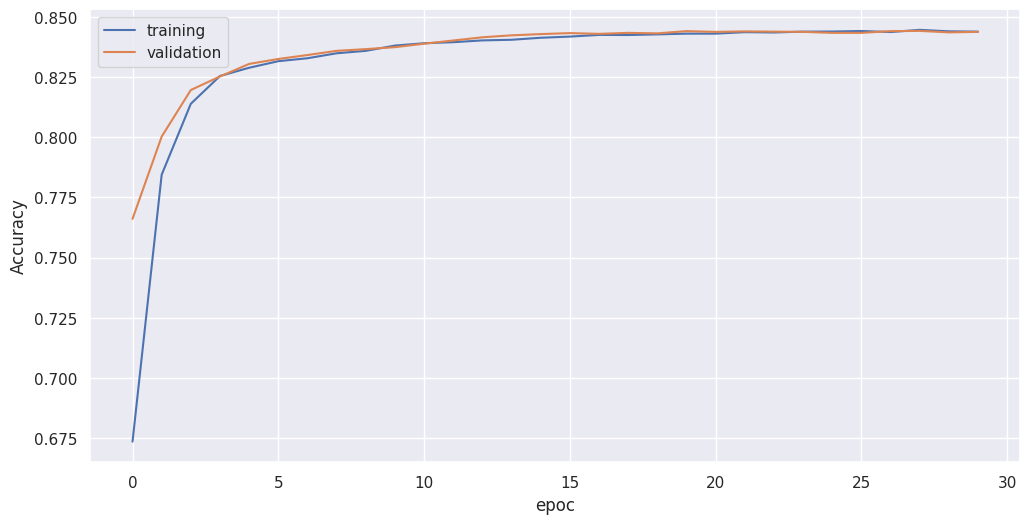

In [6]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

### Métricas


Curva AUC-ROC, Accuracy, Precision, Recall, F1 score:

/home/tomas/FIUBA/Organización de Datos/entorno_virtual/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy: 0.8437915856280069 
Precision: 0.7163561076604554 
Recall: 0.9260159308761982 
F1-score: 0.6446204005589193 

Curva ROC-AUC:


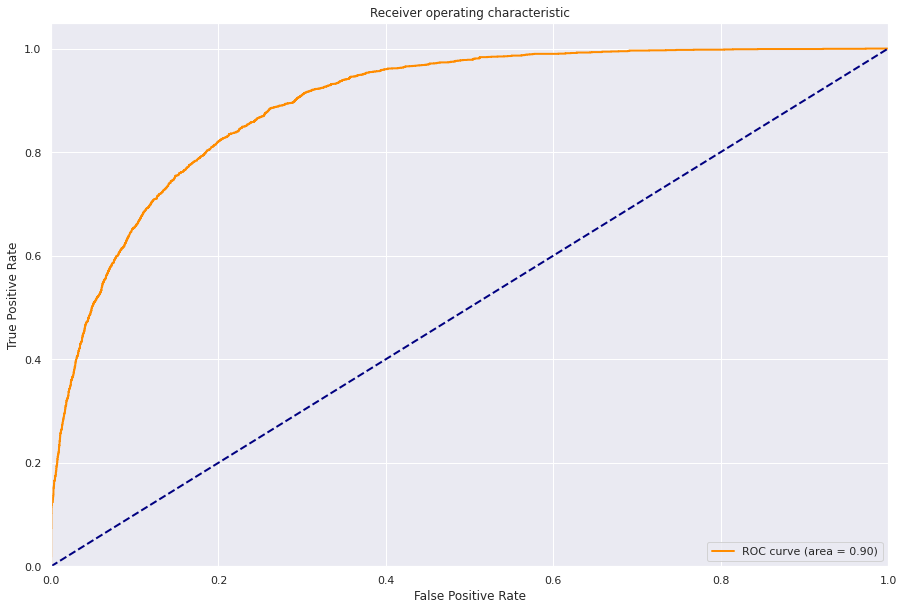

In [7]:
from sklearn.metrics import plot_roc_curve

y_proba = model.predict(X_test)
y_pred = model.predict_classes(X_test)
informe.imprimir_metricas_red(y_test, y_pred)
print("Curva ROC-AUC:")
informe.plot_roc(model, X_test, y_test, classifier=False, y_proba=y_proba)

# Conclusión
      
### Informe del modelo 2 usando los datos del test_holdout

/home/tomas/FIUBA/Organización de Datos/entorno_virtual/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


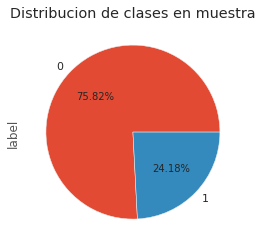

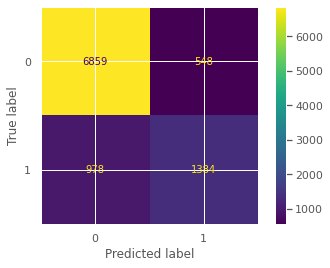

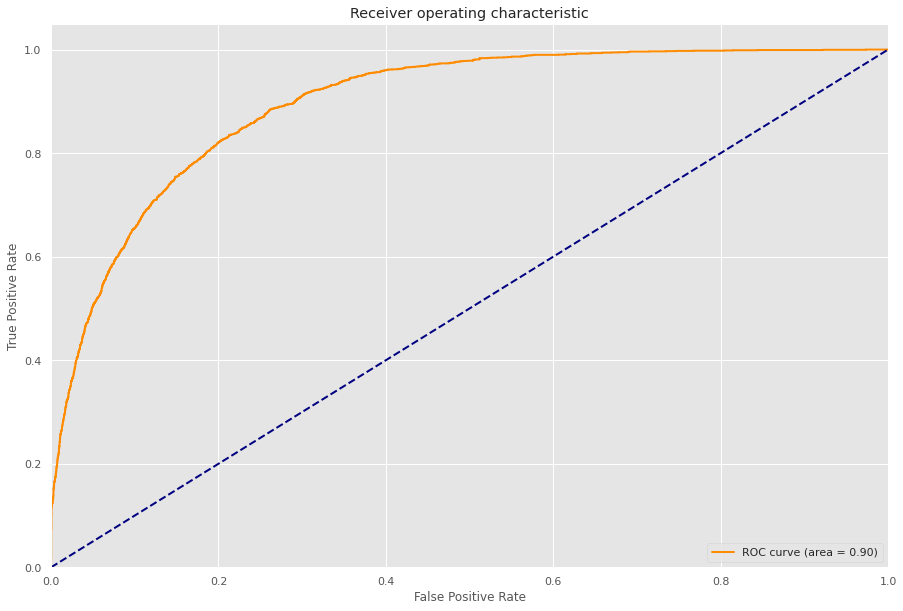

Métricas:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7407
           1       0.72      0.59      0.64      2362

    accuracy                           0.84      9769
   macro avg       0.80      0.76      0.77      9769
weighted avg       0.84      0.84      0.84      9769



In [8]:
y_pred = model.predict_classes(X_test)

informe.plt_distribucion_de_clases(y_test)
sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(y_test, y_pred)).plot()
informe.plot_roc(model, X_test, y_test, classifier=False, y_proba=y_proba)
print('Métricas:')
print(sklearn.metrics.classification_report(y_test, y_pred))

## Conclusiones de las métricas observadas de los datos de hold_out

- accuracy:

        El modelo clasifica los datos de forma correcta en aproximadamente un 84%, viendo la distribucion de clases de la muestra se observa que el 0 es la clase mayoritaria con una proporción de aproximadamente 76%. Por lo tanto el modelo es mejor predictor que devolver siempre cero.
    
    
- precisión:

        La fracción de predicciones de 0's que realmente eran 0's fue de aproximadamente 88% y la fracción de predicciones de 1's que realmente eran 1's fue del 71% 


- recall:

        Los 0's reales detectados fueron aproximadamente del 92%, y los 1's reales detectados fueron del 60%. Se ve que el modelo tiene un buen recall y precisión.
        

- f1 score:
   
       Este resultado da una idea de la calidad del recall y la precision asi como el balance entre ellos.
       
       
- matriz de confusion:

        Se puede ver que la cantidad de falsos negativos y falsos positivos fue similar. Sin embargo, la mayoría de las predicciones están en la diagonal.
        
        
- UAC ROC:

        Esta métrica indica que el modelo es bueno distinguiendo clases en un 90%. Este valor será utilizado para decidir sobre la elección de este modelo.


# Final test

In [9]:
df_test = informe.get_df_test()

#preprocesamiento
df_test = preprocessing.remove_irrelevant_features(df_test)
df_test = preprocessing.one_hot_encodding(df_test)
df_test = scalar.transform(df_test)

y_pred = model.predict_classes(df_test)
informe.save_pred(y_pred, 'red_neuronal')

ValueError: X has 40 features, but this StandardScaler is expecting 4 features as input.